In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import os.path as pth
import openmdao.api as om
import logging
import shutil
import fastoad.api as oad


DATA_FOLDER_PATH = "data"

WORK_FOLDER_PATH = "workdir"
CONFIGURATION_FILE = pth.join(WORK_FOLDER_PATH, "oad_sizing.yml")
SOURCE_FILE = pth.join(DATA_FOLDER_PATH, "CeRAS01_baseline.xml")

# For having log messages on screen
logging.basicConfig(level=logging.INFO, format="%(levelname)-8s: %(message)s")

# For using all screen width
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:
#oad.generate_configuration_file(CONFIGURATION_FILE, overwrite=True)

# The above generated configuration uses the quick and simple Breguet module to compute performances.
# If you want to use the more accurate, much more CPU-costly time-step integration, uncomment and run
# the next line:
shutil.copy(pth.join(DATA_FOLDER_PATH, "oad_sizing.yml"), CONFIGURATION_FILE)

'workdir\\oad_sizing.yml'

In [4]:
oad.generate_inputs(CONFIGURATION_FILE, SOURCE_FILE, overwrite=True)

INFO    : Loading FAST-OAD plugin bundled
INFO    : Loading bundles from fastoad.models
INFO    : Installed bundle fastoad.models.performances.mission.openmdao.__init__ (ID 21 )
INFO    : Installed bundle fastoad.models.performances.mission.segments.__init__ (ID 31 )
INFO    : Installed bundle fastoad.models.performances.mission.segments.cruise (ID 26 )
INFO    : Installed bundle fastoad.models.performances.mission.mission_definition.__init__ (ID 16 )
INFO    : Installed bundle fastoad.models.performances.mission.polar (ID 22 )
INFO    : Installed bundle fastoad.models.performances.mission.mission_definition.exceptions (ID 12 )
INFO    : Installed bundle fastoad.models.performances.mission.openmdao.mission (ID 18 )
INFO    : Installed bundle fastoad.models.performances.mission.routes (ID 23 )
INFO    : Installed bundle fastoad.models.performances.mission.__init__ (ID 33 )
INFO    : Installed bundle fastoad.models.performances.mission.segments.hold (ID 27 )
INFO    : Installed bundle fa

'C:\\Users\\PC\\PycharmProjects\\FAST-PEDAGO\\Presentation\\workdir\\problem_inputs.xml'

In [5]:
oad.list_variables(CONFIGURATION_FILE)

NAME,I/O,DESCRIPTION
data:TLAR:NPAX,IN,"top-level requirement: number of passengers, assuming a classic eco/business class repartition"
data:TLAR:approach_speed,IN,top-level requirement: approach speed
data:TLAR:cruise_mach,IN,Input defined by the mission.
data:TLAR:range,IN,Input defined by the mission.
data:aerodynamics:aircraft:landing:CL_max_clean_2D,IN,maximum lift coefficient of 2D average profile in landing conditions without high-lift devices
data:aerodynamics:aircraft:takeoff:mach,IN,considered Mach number for takeoff phase
data:geometry:cabin:aisle_width,IN,width of aisles
data:geometry:cabin:containers:count_by_row,IN,number of cargo containers along width
data:geometry:cabin:crew_count:technical,IN,number of technical crew members
data:geometry:cabin:exit_width,IN,width of exits


In [6]:
oad.list_modules(CONFIGURATION_FILE)
# api.list_modules(CONFIGURATION_FILE, verbose=True) # Use this line instead of the previous one for detailed information (text format only)

AVAILABLE MODULE IDENTIFIERS,MODULE PATH
fastoad.aerodynamics.highspeed.legacy,C:\Users\PC\anaconda3\envs\FAST-PEDAGO\lib\site-packages\fastoad_cs25\models\aerodynamics\aerodynamics_high_speed.py
fastoad.aerodynamics.landing.legacy,C:\Users\PC\anaconda3\envs\FAST-PEDAGO\lib\site-packages\fastoad_cs25\models\aerodynamics\aerodynamics_landing.py
fastoad.aerodynamics.lowspeed.legacy,C:\Users\PC\anaconda3\envs\FAST-PEDAGO\lib\site-packages\fastoad_cs25\models\aerodynamics\aerodynamics_low_speed.py
fastoad.aerodynamics.takeoff.legacy,C:\Users\PC\anaconda3\envs\FAST-PEDAGO\lib\site-packages\fastoad_cs25\models\aerodynamics\aerodynamics_takeoff.py
fastoad.geometry.legacy,C:\Users\PC\anaconda3\envs\FAST-PEDAGO\lib\site-packages\fastoad_cs25\models\geometry\geometry.py
fastoad.handling_qualities.static_margin,C:\Users\PC\anaconda3\envs\FAST-PEDAGO\lib\site-packages\fastoad_cs25\models\handling_qualities\compute_static_margin.py
fastoad.handling_qualities.tail_sizing,C:\Users\PC\anaconda3\envs\FAST-PEDAGO\lib\site-packages\fastoad_cs25\models\handling_qualities\tail_sizing\compute_tail_areas.py
fastoad.loop.wing_area,C:\Users\PC\anaconda3\envs\FAST-PEDAGO\lib\site-packages\fastoad_cs25\models\loops\compute_wing_area.py
fastoad.loop.wing_position,C:\Users\PC\anaconda3\envs\FAST-PEDAGO\lib\site-packages\fastoad_cs25\models\loops\compute_wing_position.py
fastoad.mass_performances.compute_MTOW,C:\Users\PC\anaconda3\envs\FAST-PEDAGO\lib\site-packages\fastoad\models\performances\mission\openmdao\link_mtow.py


In [7]:
N2_FILE = pth.join(WORK_FOLDER_PATH, "n2.html")
oad.write_n2(CONFIGURATION_FILE, N2_FILE, overwrite=True)
from IPython.display import IFrame

IFrame(src=N2_FILE, width="100%", height="500px")

INFO    : N2 diagram written in C:\Users\PC\PycharmProjects\FAST-PEDAGO\Presentation\workdir\n2.html


In [16]:
XDSM_FILE = pth.join(WORK_FOLDER_PATH, 'xdsm.html')
oad.write_xdsm(CONFIGURATION_FILE, XDSM_FILE, overwrite=True)
from IPython.display import IFrame
IFrame(src=XDSM_FILE, width='100%', height='500px')

Analysis FASTOADModel pushed


In [17]:
eval_problem = oad.evaluate_problem(CONFIGURATION_FILE, overwrite=True)

INFO    : Mission computation - iteration 0 : Using initializer computation. OTHER ITERATIONS NEEDED.
INFO    : Mission computation - iteration 1 : Using mission definition.
INFO    : Mission computation - iteration 2 : Using mission definition.
INFO    : Mission computation - iteration 3 : Using mission definition.
INFO    : Mission computation - iteration 4 : Using mission definition.
INFO    : Mission computation - iteration 5 : Using mission definition.
INFO    : Mission computation - iteration 6 : Using mission definition.
INFO    : Mission computation - iteration 7 : Using mission definition.
INFO    : Mission computation - iteration 8 : Using mission definition.
INFO    : Mission computation - iteration 9 : Using mission definition.
INFO    : Mission computation - iteration 10 : Using mission definition.
INFO    : Mission computation - iteration 11 : Using mission definition.
INFO    : Mission computation - iteration 12 : Using mission definition.
INFO    : Mission computation -

NL: NLBGS Converged in 35 iterations


INFO    : Computation finished after 54.11 seconds
INFO    : Problem outputs written in C:\Users\PC\PycharmProjects\FAST-PEDAGO\Presentation\workdir\problem_outputs.xml


In [18]:
oad.variable_viewer(eval_problem.output_file_path)

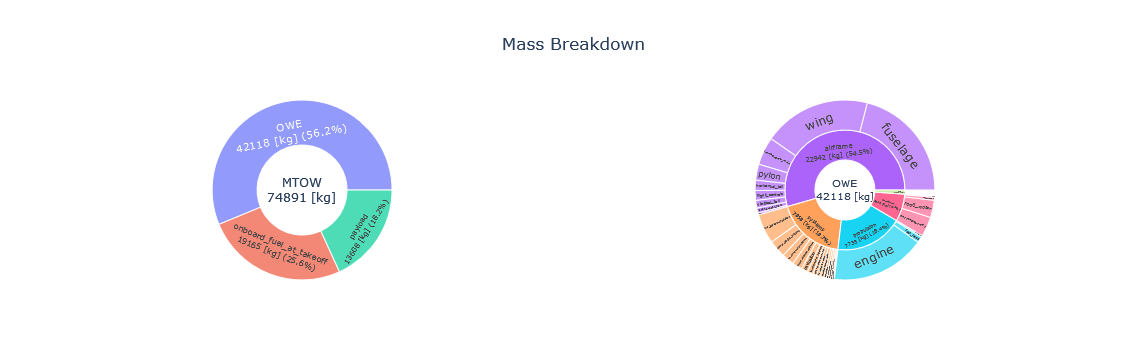

In [19]:
oad.mass_breakdown_sun_plot(eval_problem.output_file_path)

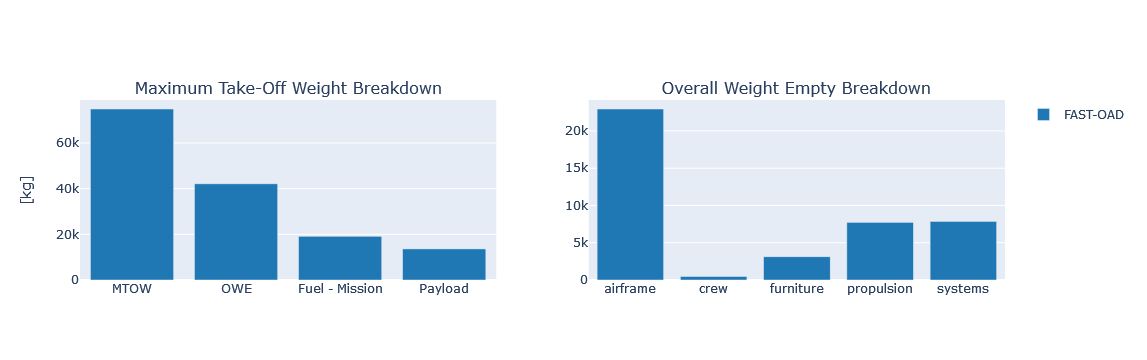

In [20]:
fig = oad.mass_breakdown_bar_plot(eval_problem.output_file_path, name="FAST-OAD")
fig.show()

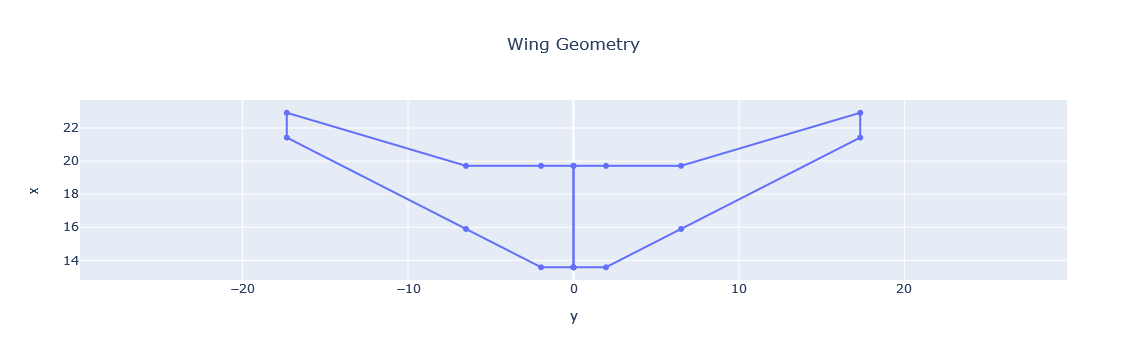

In [21]:
fig = oad.wing_geometry_plot(eval_problem.output_file_path, name="FAST-OAD")
fig.show()

In [22]:
oad.aircraft_geometry_plot(eval_problem.output_file_path)

FigureWidget({
    'data': [{'mode': 'lines+markers',
              'type': 'scatter',
              'uid': 'd…